In this notebook, we examine rasters of the NYC area over the past 2 years. Using a machine learning model trained to classify different kinds land cover, adapated for this landscape, we can better characterize the kind of land cover to exist here, and what changes have occurred.

In [49]:
import sys
import geopandas as gpd # for reading shapefiles
import folium  # library to create interactive maps
from shapely.geometry import MultiPolygon, Polygon
import os 
import rasterio as rio
from rasterio.mask import mask
import zipfile
import rasterio
import json
import shutil
import cv2
import numpy as np
from tqdm import tqdm
import torch
from collections import Counter
from datetime import datetime
import pandas as pd
import imageio

# read credentials.json
with open('credentials.json') as f:
    credentials = json.load(f)

import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
image_dir = 'data/landcover.ai.v1/images'
mask_dir = 'data/landcover.ai.v1/masks'
images = os.listdir(image_dir)
masks = os.listdir(mask_dir)

In [51]:
img_raster = imageio.imread('data/landcover.ai.v1/output/M-33-7-A-d-3-2_106.jpg')
mask_raster = imageio.imread('data/landcover.ai.v1/output/M-33-7-A-d-3-2_106_m.png')

/var/folders/27/vq5y844134sb8423ngwxqzgc0000gn/T/ipykernel_25932/3159852466.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_raster = imageio.imread('data/landcover.ai.v1/output/M-33-7-A-d-3-2_106.jpg')
/var/folders/27/vq5y844134sb8423ngwxqzgc0000gn/T/ipykernel_25932/3159852466.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  mask_raster = imageio.imread('data/landcover.ai.v1/output/M-33-7-A-d-3-2_106_m.png')


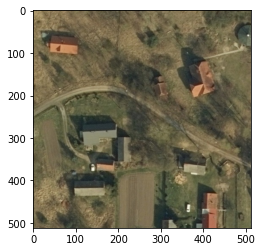

In [52]:
plt.imshow(img_raster)

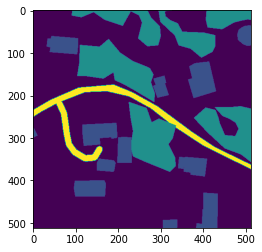

In [63]:
plt.imshow(mask_raster[:,:,2])

In [66]:
import numpy as np

In [73]:
f = open('data/landcover.ai.v1/train.txt')
train_data = f.read().split('\n')
f.close()

In [76]:
x = f'data/landcover.ai.v1/output/{train_data[0]}.jpg'
y = f'data/landcover.ai.v1/output/{train_data[0]}_m.png'

In [77]:
img_raster = imageio.imread(x)
mask_raster = imageio.imread(y)

/var/folders/27/vq5y844134sb8423ngwxqzgc0000gn/T/ipykernel_25932/2984475362.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_raster = imageio.imread(x)
/var/folders/27/vq5y844134sb8423ngwxqzgc0000gn/T/ipykernel_25932/2984475362.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  mask_raster = imageio.imread(y)


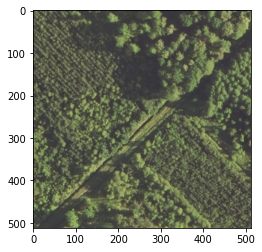

In [78]:
plt.imshow(img_raster)

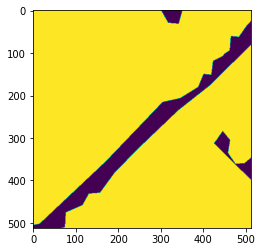

In [79]:
plt.imshow(mask_raster[:,:,0])

In [80]:
len(os.listdir('data/landcover.ai.v1/output'))

21348

In [88]:
from scipy import ndimage, misc


In [90]:
zoomed_image = ndimage.zoom(img_raster, 3.0)


In [91]:
zoomed_image.shape

(1536, 1536, 9)

In [92]:
img_raster.shape

(512, 512, 3)

TypeError: Invalid shape (1536, 1536, 9) for image data

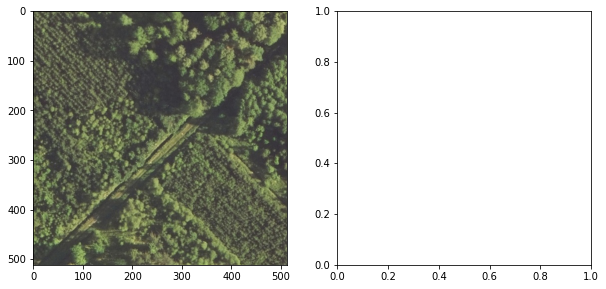

In [93]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(img_raster)
plt.subplot(122)
plt.imshow(zoomed_image)

In [ ]:
# to make this match perfectly, what I'd need to do is run a clipped zoom program on the original imput to match it to the 10m resolution, then strip out the empty space created, and then run the tiling procedure for 
# generating segmentation maps. 